In [2]:
import pyodbc
import pandas as pd

# Set your credentials here
server = 'DESKTOP-6NBPH33'  # or your instance name
database = 'DW_Finance'  # or the actual DB name
username = 'rana'  # if using SQL Server Authentication
password = 'rana'

# Use this if you're using SQL Server Authentication
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

conn = pyodbc.connect(conn_str)

In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import pyodbc
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\MSI\AppData\Local\Temp\ipykernel_19760\1802603301.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\MSI\AppData\Local\Temp\ipykernel_19760\1802603301.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_series = df['Price'].resample('M').mean().dropna()
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency infor

ADF Statistic: -8.4618
p-value: 0.0000
✅ La série est stationnaire.
RMSE: 17.85


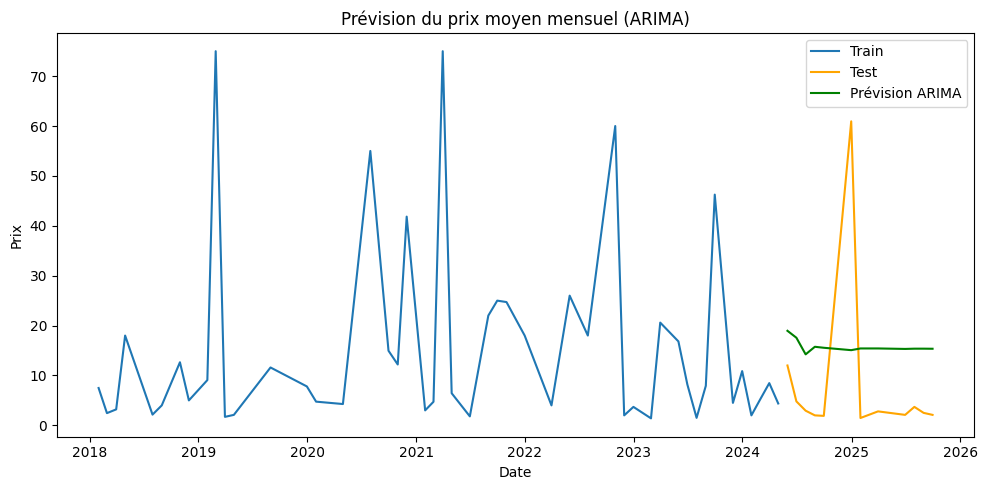

c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import pyodbc

# Connexion à la base de données
# conn = pyodbc.connect('DRIVER={SQL Server};SERVER=your_server;DATABASE=DW_Finance;UID=your_uid;PWD=your_pwd')

# Requête SQL
query = """
SELECT 
    p.Price,
    d.Date AS PurchaseDate
FROM 
    dbo.Fact_Purchase p
JOIN 
    dbo.Dim_Date d ON p.Fk_Date = d.Pk_Date
"""

# Chargement des données
df = pd.read_sql(query, conn)

# Préparation des dates
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df.set_index('PurchaseDate', inplace=True)

# Série mensuelle : prix moyen par mois
price_series = df['Price'].resample('M').mean().dropna()

# Test ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] <= 0.05:
        print("✅ La série est stationnaire.")
        return True
    else:
        print("❌ La série n'est pas stationnaire.")
        return False

# Vérifier et rendre stationnaire
if adf_test(price_series):
    ts = price_series
    d = 0
else:
    ts = price_series.diff().dropna()
    d = 1
    adf_test(ts)  # Vérifie la stationnarité après différenciation

# Split train/test
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Modélisation ARIMA simple
model = ARIMA(train, order=(5, d, 0))  # tu peux ajuster p=5, d=0/1, q=0
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Évaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Prévision ARIMA', color='green')
plt.title('Prévision du prix moyen mensuel (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.tight_layout()
plt.show()
model = ARIMA(price_series, order=(5, 0, 0))  # d=0 car stationnaire
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)  # prévisions pour 12 mois


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWar

[SARIMAX] MAE: 15.55, MSE: 390.52, RMSE: 19.76


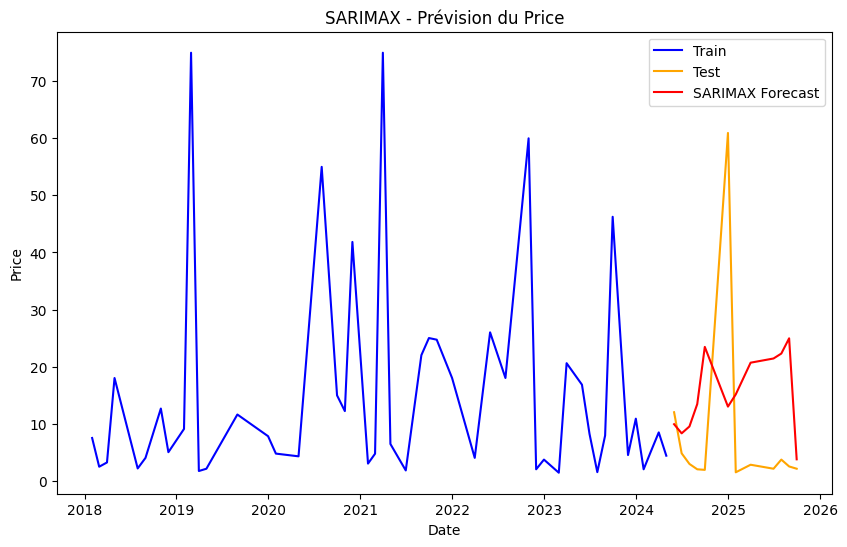

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Diviser en train/test
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# Application de SARIMAX
sarimax_model = SARIMAX(train, order=(5, 0, 0), seasonal_order=(1, 1, 1, 12))  # Paramètres (p,d,q) et saisonnalité (1,1,1,12)
sarimax_fit = sarimax_model.fit()

# Prédictions
sarimax_forecast = sarimax_fit.forecast(steps=len(test))

# Évaluation du modèle SARIMAX
mae_sarimax = mean_absolute_error(test, sarimax_forecast)
mse_sarimax = mean_squared_error(test, sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)

# Affichage des résultats
print(f"[SARIMAX] MAE: {mae_sarimax:.2f}, MSE: {mse_sarimax:.2f}, RMSE: {rmse_sarimax:.2f}")

# Visualisation de la prévision SARIMAX
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX - Prévision du Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


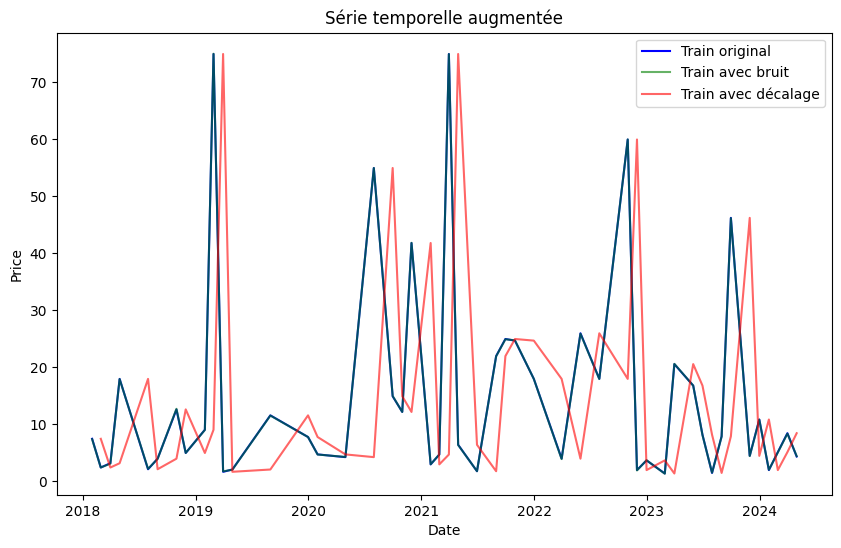

c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueW

[SARIMAX avec augmentation] MAE: 11.20, MSE: 343.79, RMSE: 18.54


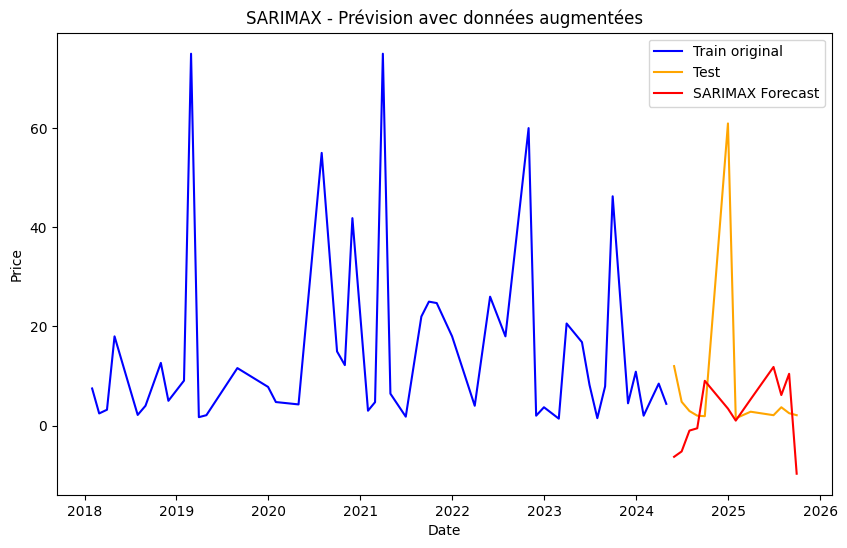

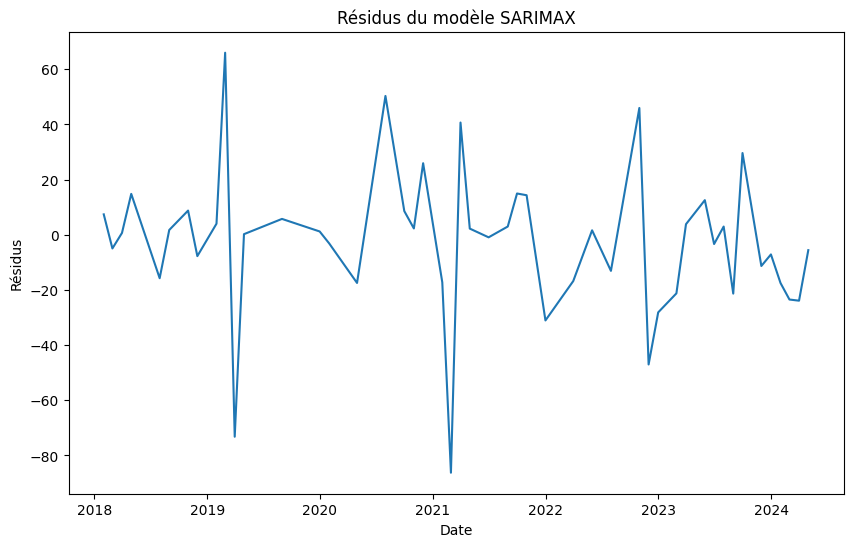

Test de normalité des résidus : Statistique = 0.9317, p-value = 0.0079


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fonction pour ajouter du bruit à la série temporelle
def add_noise(series, noise_level=0.1):
    noise = np.random.normal(loc=0, scale=noise_level, size=len(series))
    return series + noise

# Fonction pour effectuer un décalage temporel (lagging)
def create_lagged_data(series, lag=1):
    return series.shift(lag)

# Diviser en train/test
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# Appliquer de l'augmentation des données : ajout de bruit et décalage temporel
train_noisy = add_noise(train, noise_level=0.05)
train_lagged = create_lagged_data(train, lag=1).dropna()

# Visualisation de la série augmentée
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train original', color='blue')
plt.plot(train_noisy, label='Train avec bruit', color='green', alpha=0.6)
plt.plot(train_lagged, label='Train avec décalage', color='red', alpha=0.6)
plt.title('Série temporelle augmentée')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Application de SARIMAX avec les données augmentées
sarimax_model = SARIMAX(train_noisy, 
                       order=(5, 1, 0),       # Paramètres SARIMAX
                       seasonal_order=(1, 1, 1, 12))  # Saison de 12 mois
sarimax_fit = sarimax_model.fit()

# Prédictions
sarimax_forecast = sarimax_fit.forecast(steps=len(test))

# Évaluation du modèle SARIMAX
mae_sarimax = mean_absolute_error(test, sarimax_forecast)
mse_sarimax = mean_squared_error(test, sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)

# Affichage des résultats
print(f"[SARIMAX avec augmentation] MAE: {mae_sarimax:.2f}, MSE: {mse_sarimax:.2f}, RMSE: {rmse_sarimax:.2f}")

# Visualisation de la prévision SARIMAX
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train original', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX - Prévision avec données augmentées')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualisation des résidus pour détecter des patterns non capturés
residuals = sarimax_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Résidus du modèle SARIMAX')
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.show()

# Test de normalité des résidus (en utilisant un test de Shapiro)
stat, p_value = shapiro(residuals)
print(f"Test de normalité des résidus : Statistique = {stat:.4f}, p-value = {p_value:.4f}")


ADF Statistic: -6.2702144499645085
p-value: 4.021423430090838e-08
La série est stationnaire


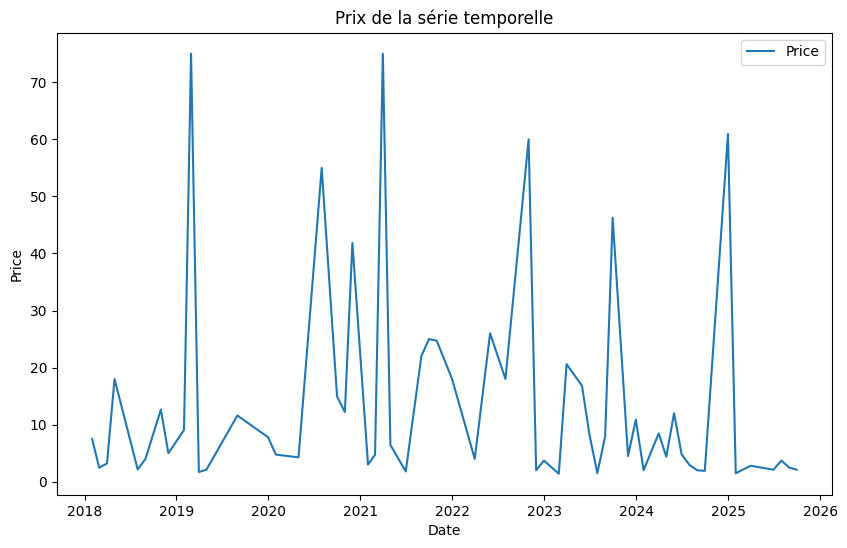

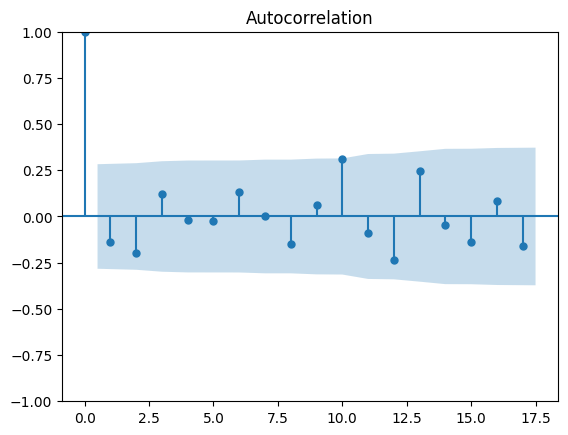

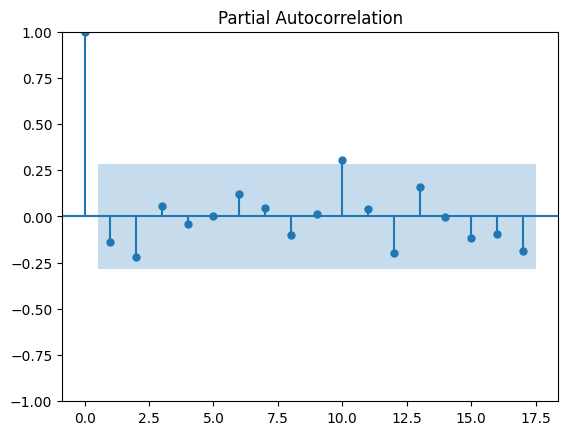

c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate

[SARIMAX avec augmentation] MAE: 11.03, MSE: 302.09, RMSE: 17.38


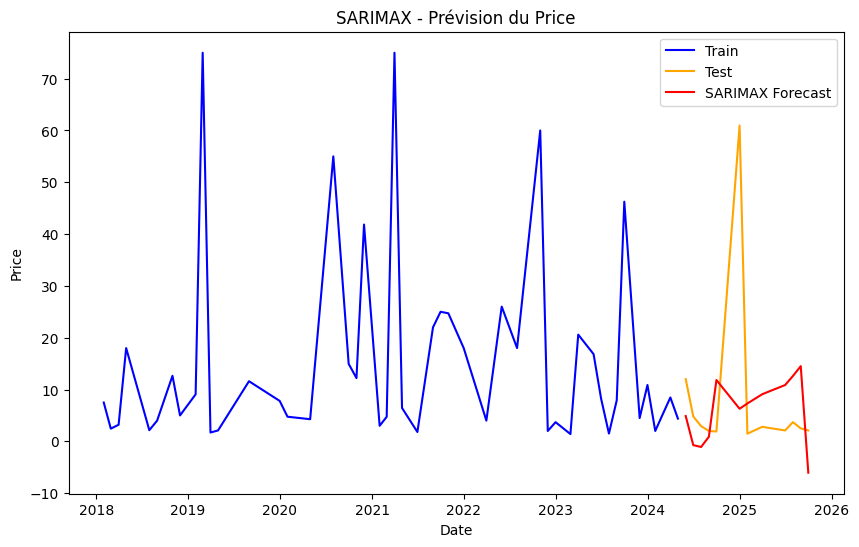

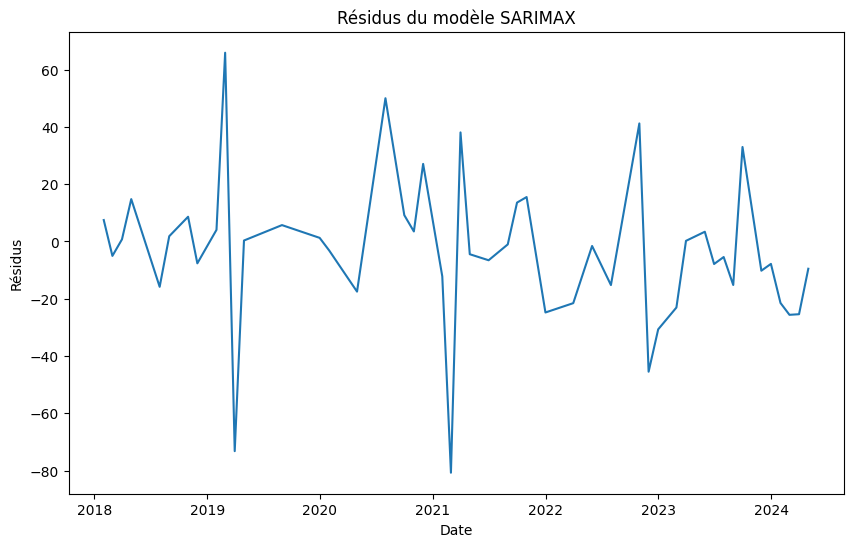

Test de normalité des résidus : Statistique = 0.9369, p-value = 0.0123


['sarimax_model.pkl']

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Fonction de test de stationnarité
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] < 0.05

# Diviser en train/test
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# Vérifier la stationnarité avant d'appliquer SARIMAX
if adf_test(train):
    print("La série est stationnaire")
else:
    print("La série n'est pas stationnaire. Différenciation nécessaire.")
    # Appliquer la différenciation si nécessaire
    train = train.diff().dropna()

# Visualisation de la série temporelle pour observer la tendance et la saisonnalité
plt.figure(figsize=(10, 6))
plt.plot(price_series, label='Price')
plt.title('Prix de la série temporelle')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualisation de l'ACF et PACF pour choisir les ordres de différenciation et d'autoregressive (p,d,q)
plot_acf(train)
plt.show()
plot_pacf(train)
plt.show()

# Application de SARIMAX avec des paramètres ajustés (à ajuster selon les résultats de ACF/PACF)
sarimax_model = SARIMAX(train, 
                       order=(5, 1, 1),       # Paramètres SARIMAX ajustés (p, d, q)
                       seasonal_order=(1, 1, 1, 12))  # Saison de 12 mois
sarimax_fit = sarimax_model.fit(disp=False)

# Prédictions
sarimax_forecast = sarimax_fit.forecast(steps=len(test))

# Évaluation du modèle SARIMAX
mae_sarimax = mean_absolute_error(test, sarimax_forecast)
mse_sarimax = mean_squared_error(test, sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)

# Affichage des résultats
print(f"[SARIMAX avec augmentation] MAE: {mae_sarimax:.2f}, MSE: {mse_sarimax:.2f}, RMSE: {rmse_sarimax:.2f}")

# Visualisation de la prévision SARIMAX
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX - Prévision du Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualisation des résidus pour détecter des patterns non capturés
residuals = sarimax_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Résidus du modèle SARIMAX')
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.show()

# Test de normalité des résidus (en utilisant un test de Shapiro)
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Test de normalité des résidus : Statistique = {stat:.4f}, p-value = {p_value:.4f}")
import joblib

# Sauvegarder le modèle SARIMAX
joblib.dump(sarimax_fit, 'sarimax_model.pkl')

